In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'sklearn'

In [21]:
# get data and display first 8 rows
data = pd.read_csv('HR_Employee_Attrition.csv')
data.head(8)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0


In [22]:
# display detailed information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
# there are 35 columns with label (Attrition)
# there is no missing (null) entry

In [24]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [25]:
# display number of unique values for each column
count = data.nunique()
count = count.sort_values()
count

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [26]:
# we can remove the columns with only 1 unique values
# also we can drop EmployeeNumber since it is unique for each employee
columns = ['Over18', 'StandardHours', 'EmployeeCount', 'EmployeeNumber']
data = data.drop(columns, axis=1)

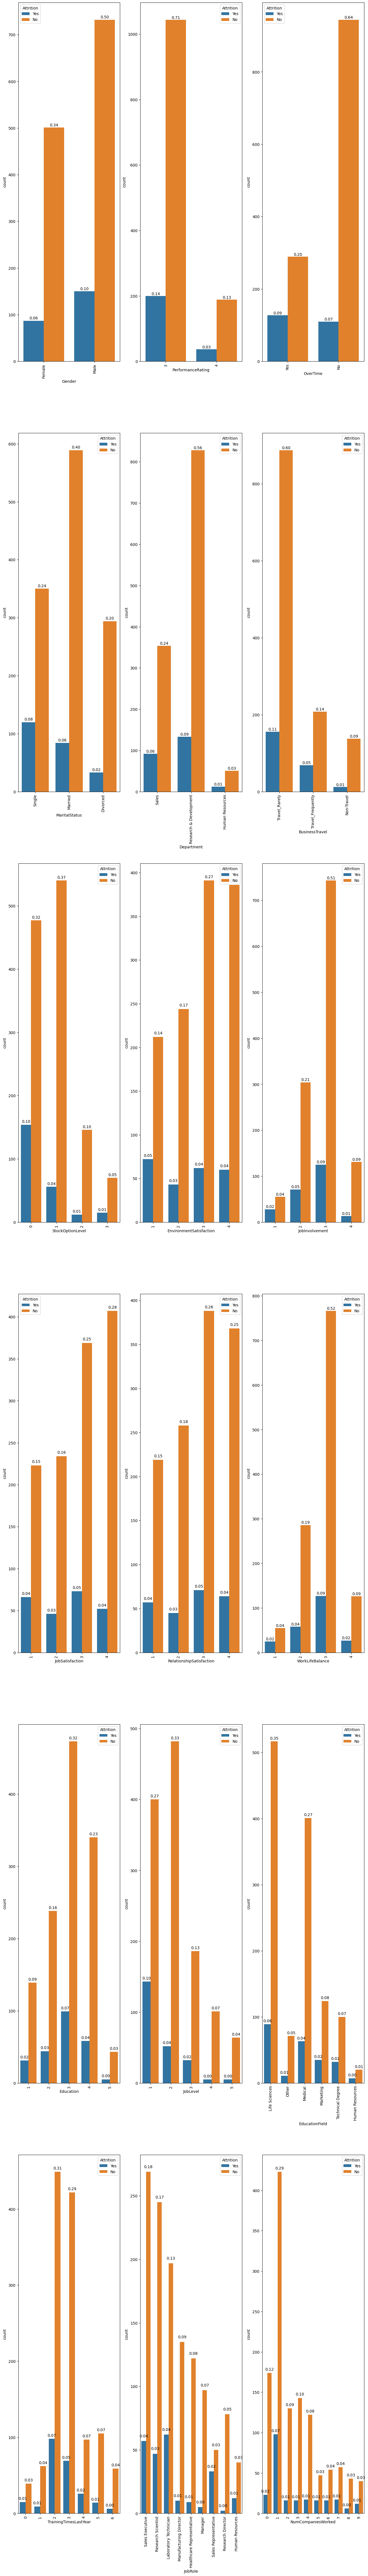

In [27]:
columns = ['Gender', 'PerformanceRating', 'OverTime',
           'MaritalStatus', 'Department', 'BusinessTravel',
           'StockOptionLevel', 'EnvironmentSatisfaction', 'JobInvolvement',
           'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance',
           'Education', 'JobLevel', 'EducationField',
           'TrainingTimesLastYear', 'JobRole', 'NumCompaniesWorked']
plt.figure(figsize=(16, 10))
k=0
for col in columns:
    k += 1
    plt.subplot(6,3,k)
    ax1 = sns.countplot(data=data, x=col, hue="Attrition")
    plt.xticks(rotation=90)
    for p in ax1.patches:
        ax1.text(p.get_x() + p.get_width()/2., p.get_height() + 3, '{:1.2f}'.format(p.get_height()/len(data), 0), ha="center", rotation=0)
plt.subplots_adjust(bottom=-8, top=1)
plt.show()

/tmp/ipykernel_394/68967520.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PercentSalaryHike'], ax = ax[0,0])
/tmp/ipykernel_394/68967520.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsSinceLastPromotion'], ax = ax[0,1])
/tmp/ipykernel_394/68967520.py:7: UserWarning: 


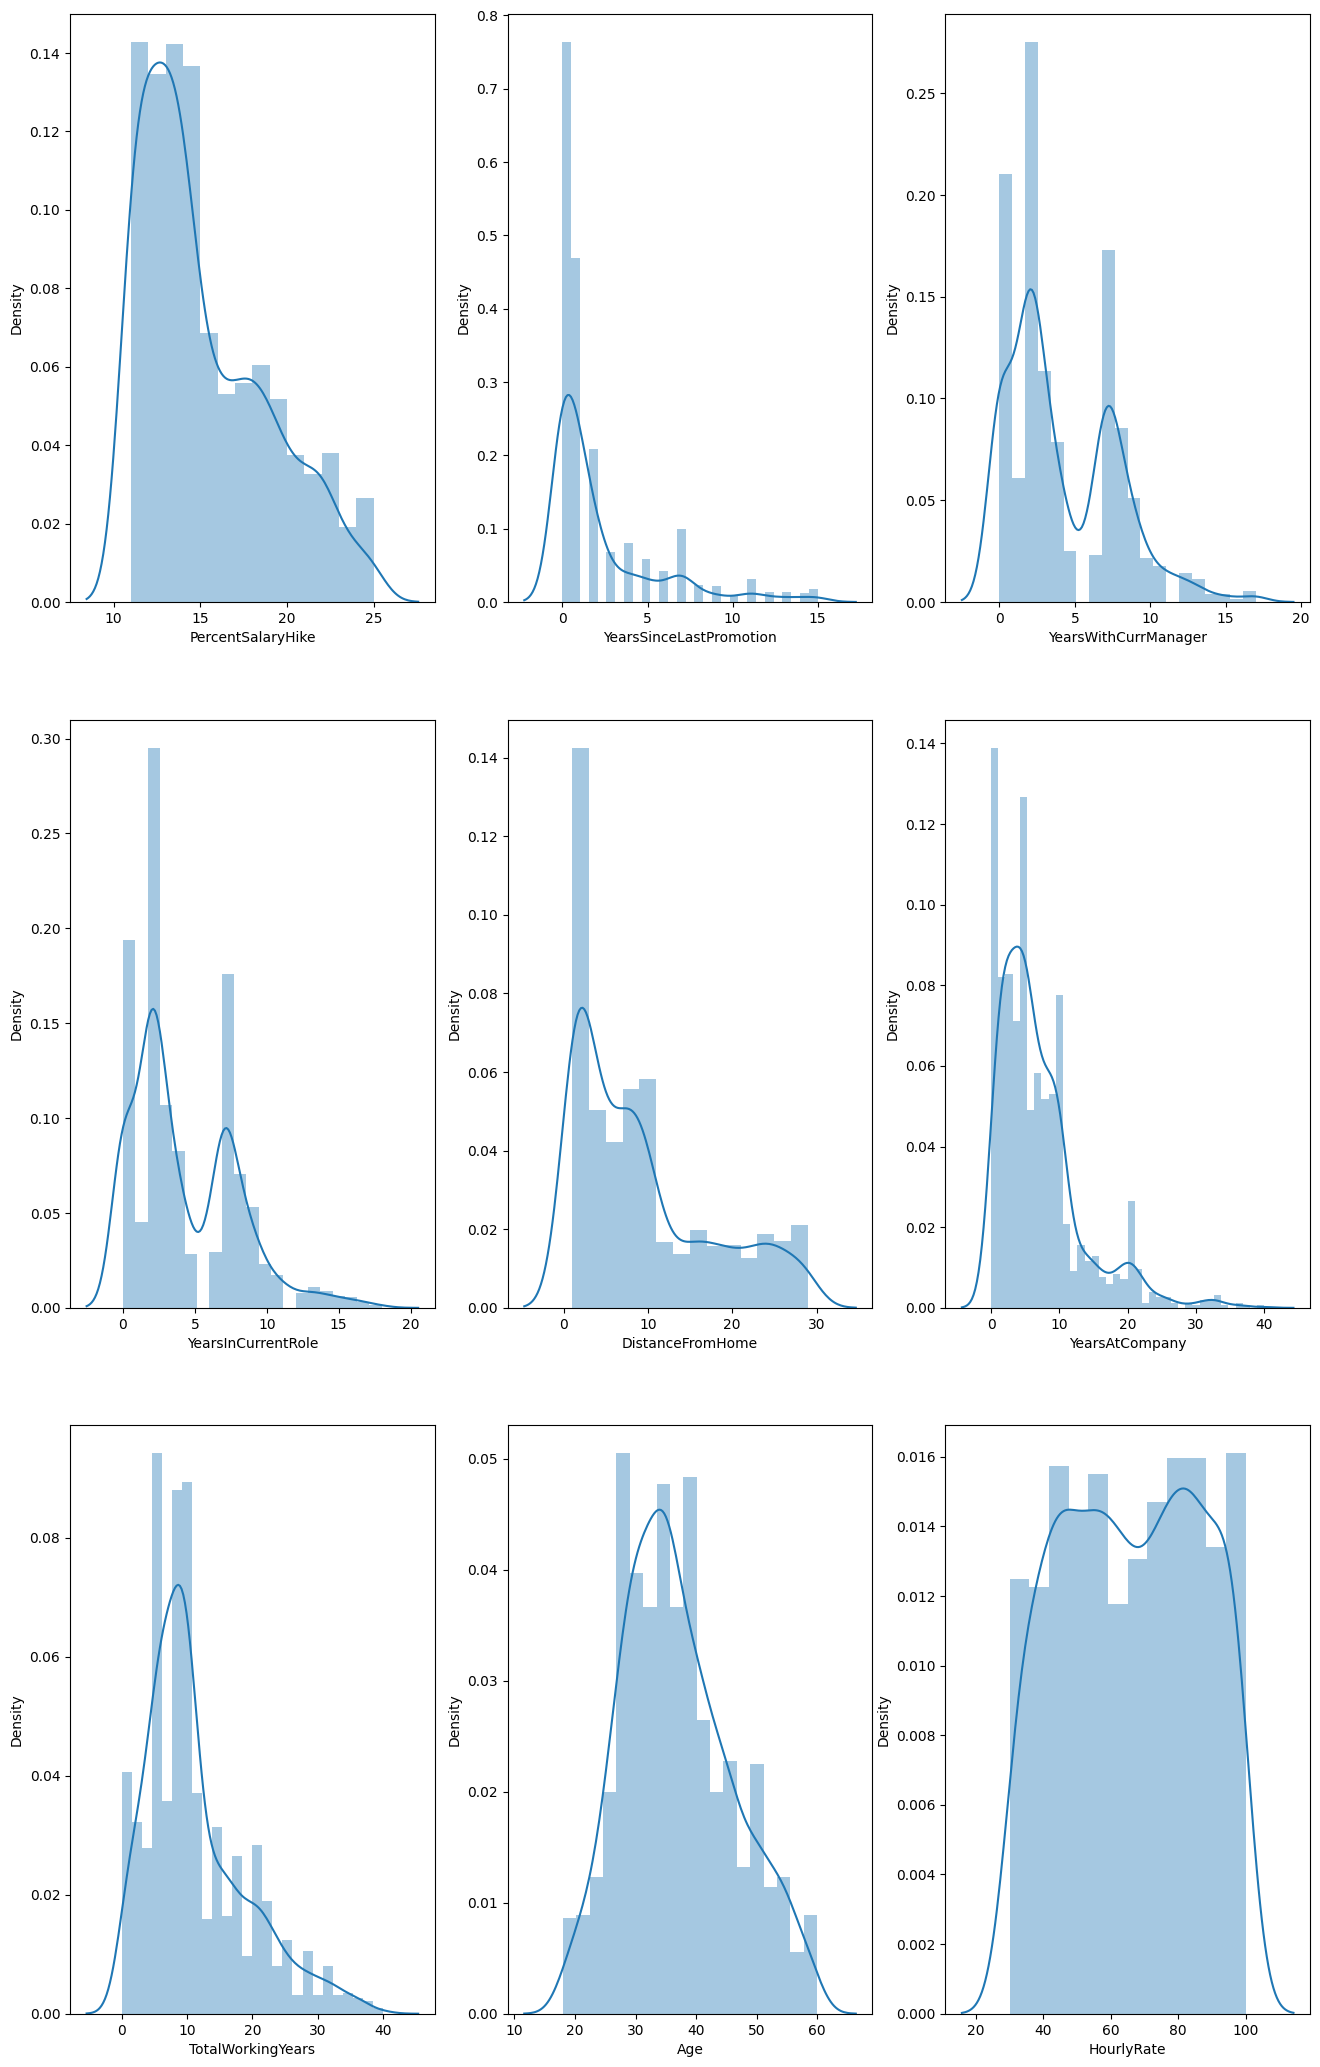

In [9]:
columns = ['PercentSalaryHike', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'YearsInCurrentRole', 'DistanceFromHome', 'YearsAtCompany',
           'TotalWorkingYears', 'Age', 'HourlyRate']
fig, ax = plt.subplots(3,3, figsize=(16,10))
sns.distplot(data['PercentSalaryHike'], ax = ax[0,0])
sns.distplot(data['YearsSinceLastPromotion'], ax = ax[0,1])
sns.distplot(data['YearsWithCurrManager'], ax = ax[0,2])
sns.distplot(data['YearsInCurrentRole'], ax = ax[1,0])
sns.distplot(data['DistanceFromHome'], ax = ax[1,1])
sns.distplot(data['YearsAtCompany'], ax = ax[1,2])
sns.distplot(data['TotalWorkingYears'], ax = ax[2,0])
sns.distplot(data['Age'], ax = ax[2,1])
sns.distplot(data['HourlyRate'], ax = ax[2,2])
plt.subplots_adjust(bottom=-1, top=1)
plt.show()

/tmp/ipykernel_394/2247500726.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['DailyRate'], ax = ax[0])
/tmp/ipykernel_394/2247500726.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MonthlyIncome'], ax = ax[1])
/tmp/ipykernel_394/2247500726.py:5: UserWarning: 

`distplot` is a

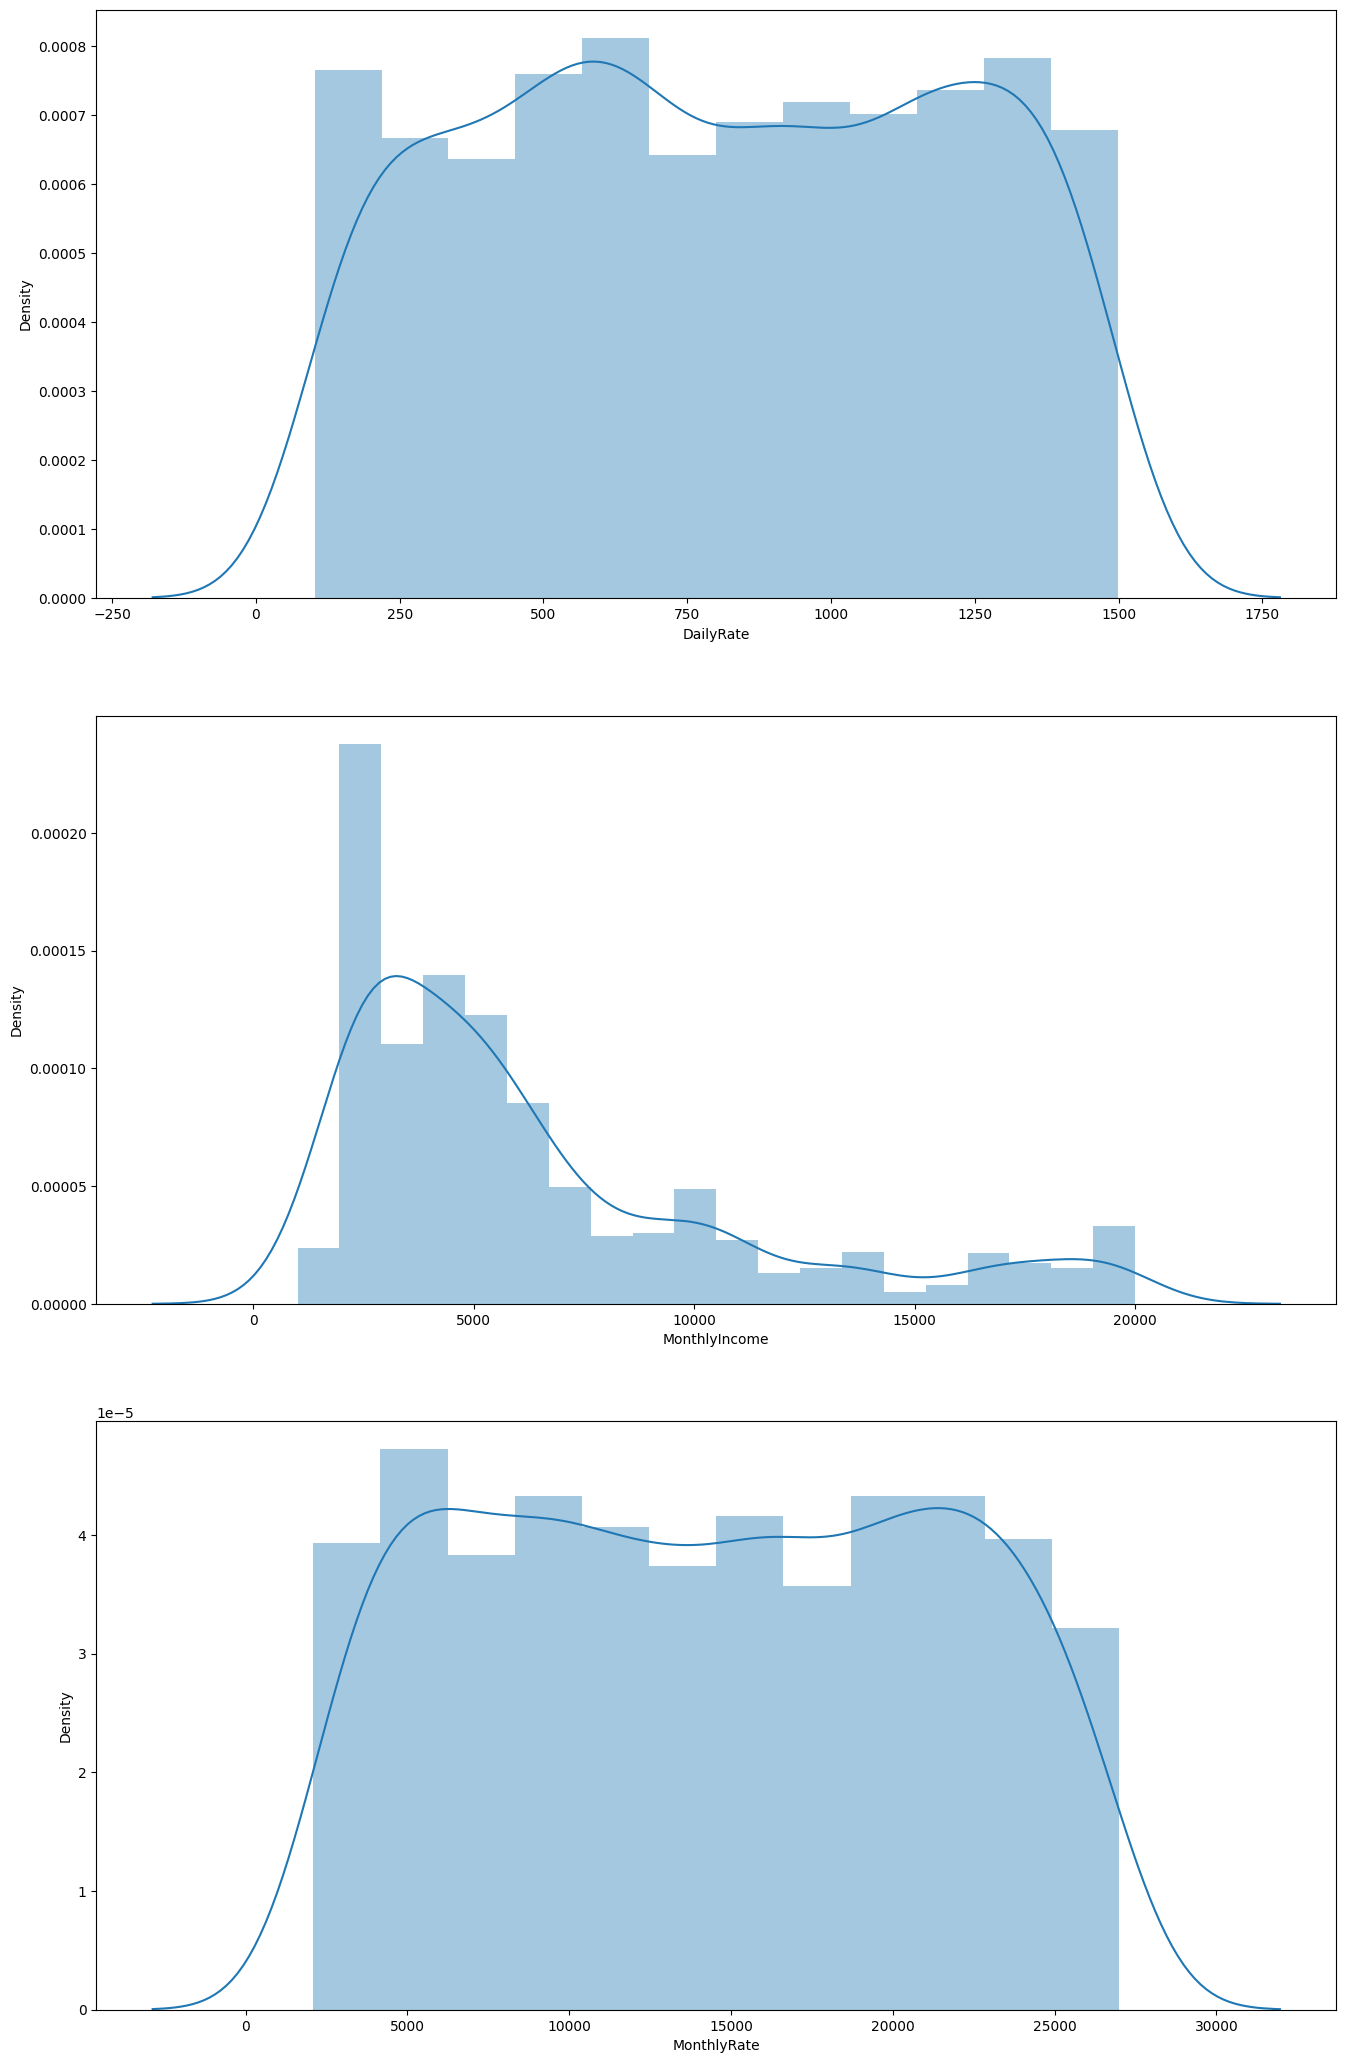

In [10]:
columns = ['DailyRate', 'MonthlyIncome', 'MonthlyRate']
fig, ax = plt.subplots(3, figsize=(16,10))
sns.distplot(data['DailyRate'], ax = ax[0])
sns.distplot(data['MonthlyIncome'], ax = ax[1])
sns.distplot(data['MonthlyRate'], ax = ax[2])
plt.subplots_adjust(bottom=-1, top=1)
plt.show()

/tmp/ipykernel_394/678137101.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)


<AxesSubplot: >

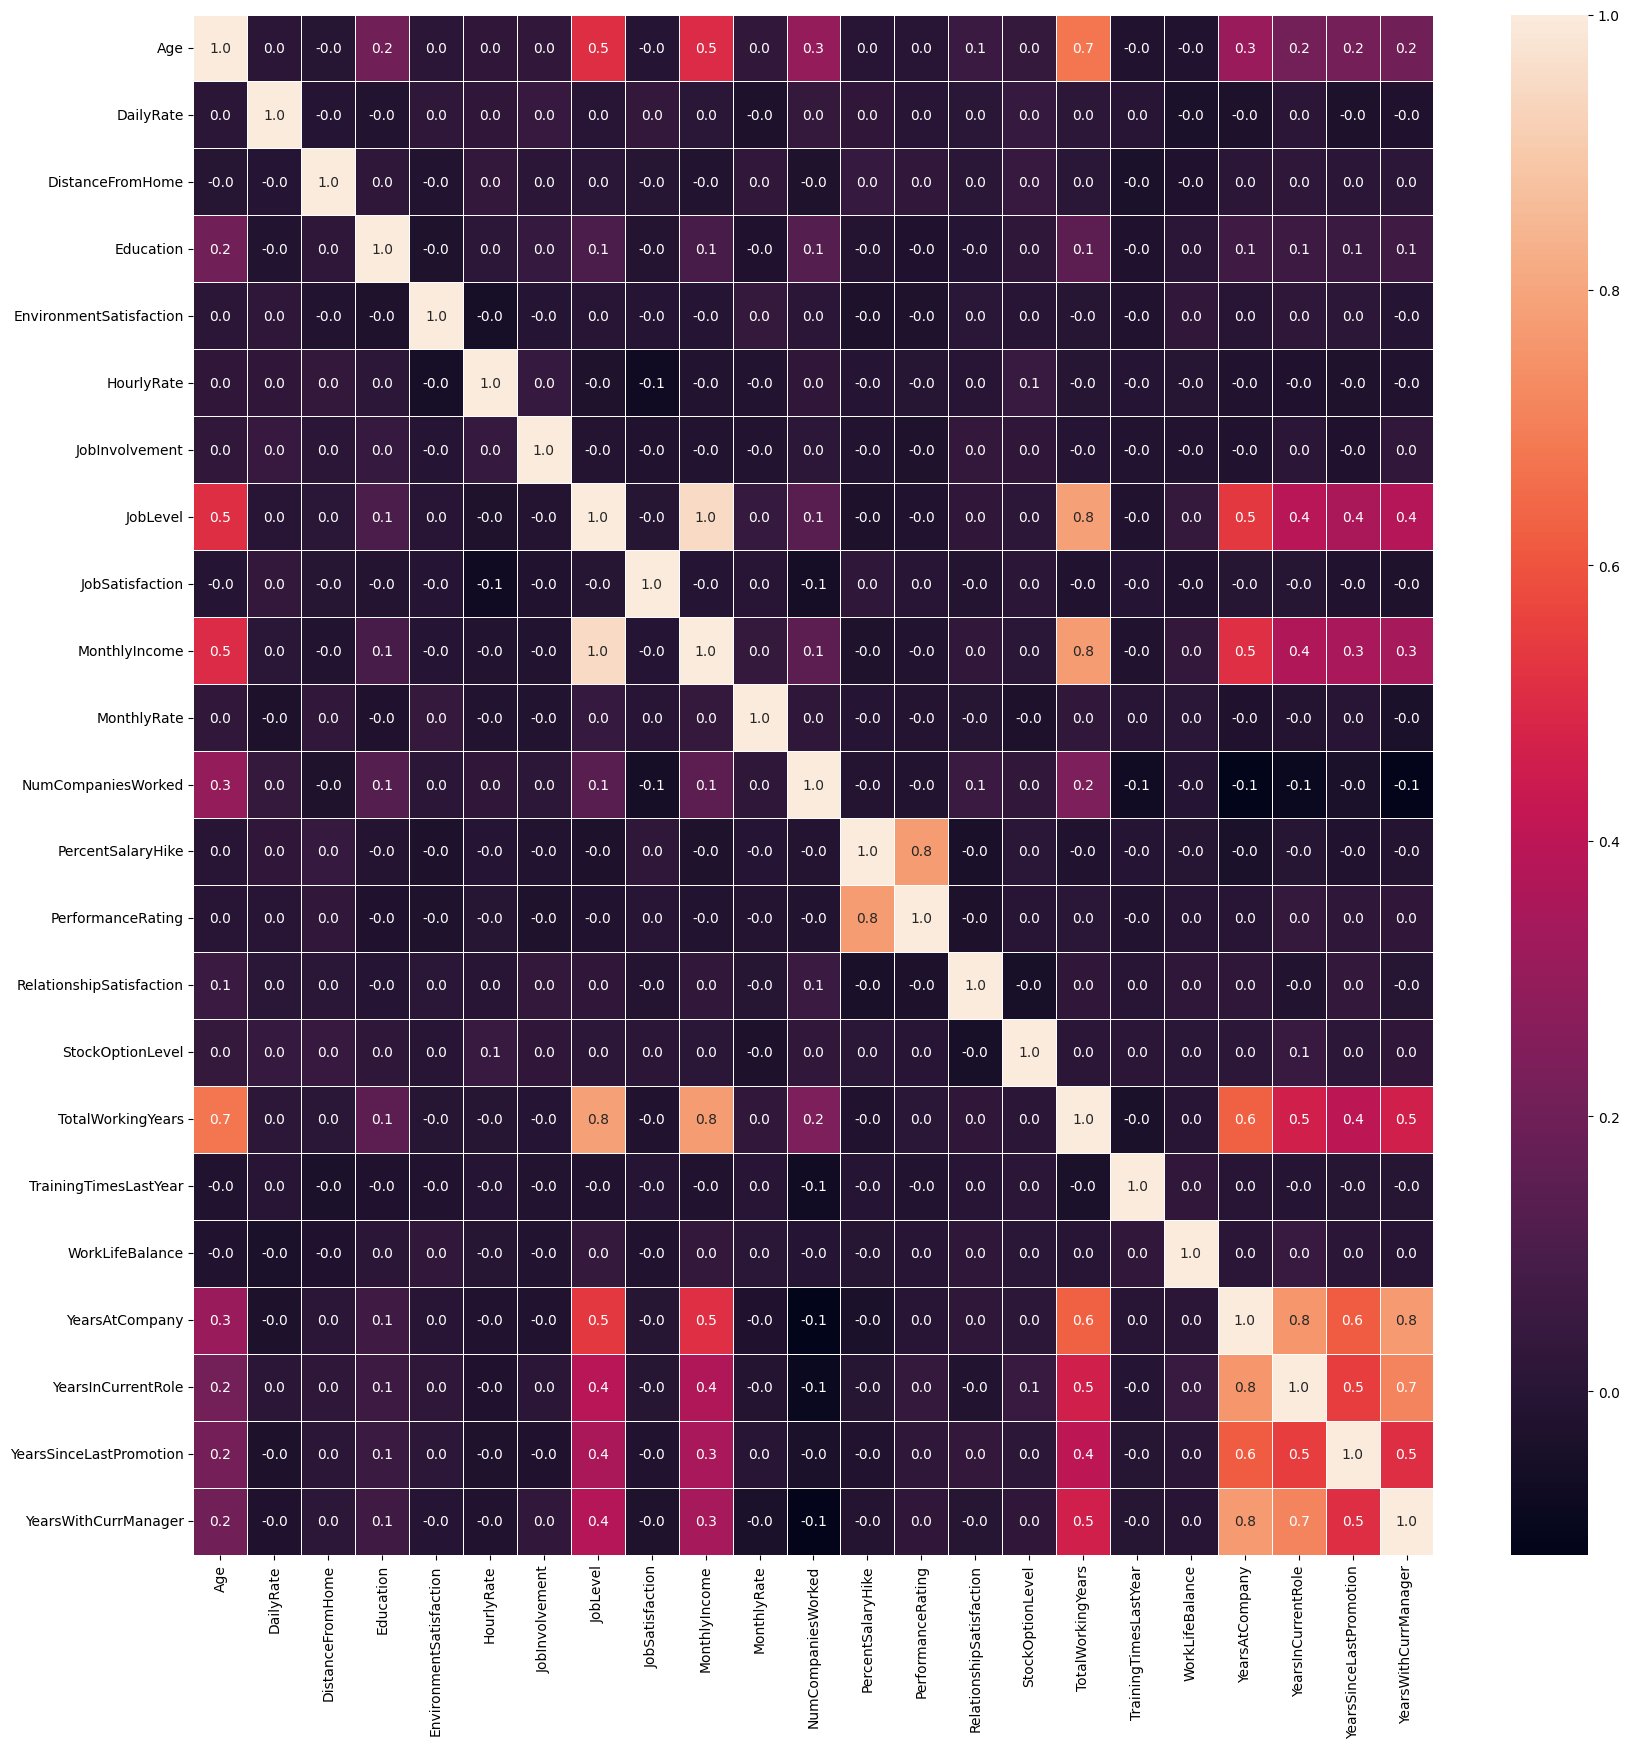

In [28]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

In [29]:
data.skew()

/tmp/ipykernel_394/1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [30]:
columns = ['DistanceFromHome', 'JobLevel', 'MonthlyIncome']
for col in columns:
    data[col] = np.log(data[col])

In [31]:
columns = ['PercentSalaryHike', 'NumCompaniesWorked', 'YearsAtCompany',
           'YearsInCurrentRole', 'YearsWithCurrManager', 'StockOptionLevel',
           'TotalWorkingYears', 'YearsSinceLastPromotion', 'PerformanceRating']
for col in columns:
    data[col] = np.sqrt(data[col])

In [32]:
data.skew()

/tmp/ipykernel_394/1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.246004
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.219763
JobSatisfaction            -0.329672
MonthlyIncome               0.286192
MonthlyRate                 0.018578
NumCompaniesWorked          0.031303
PercentSalaryHike           0.655412
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.057528
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              0.426835
YearsInCurrentRole         -0.254344
YearsSinceLastPromotion     0.739126
YearsWithCurrManager       -0.254611
dtype: float64

In [33]:
# convert strings to integers
columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
           'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
le = LabelEncoder()
for col in columns:
    data[col] = le.fit_transform(data[col])

NameError: name 'LabelEncoder' is not defined

/tmp/ipykernel_394/68967520.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PercentSalaryHike'], ax = ax[0,0])
/tmp/ipykernel_394/68967520.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsSinceLastPromotion'], ax = ax[0,1])
/tmp/ipykernel_394/68967520.py:7: UserWarning: 


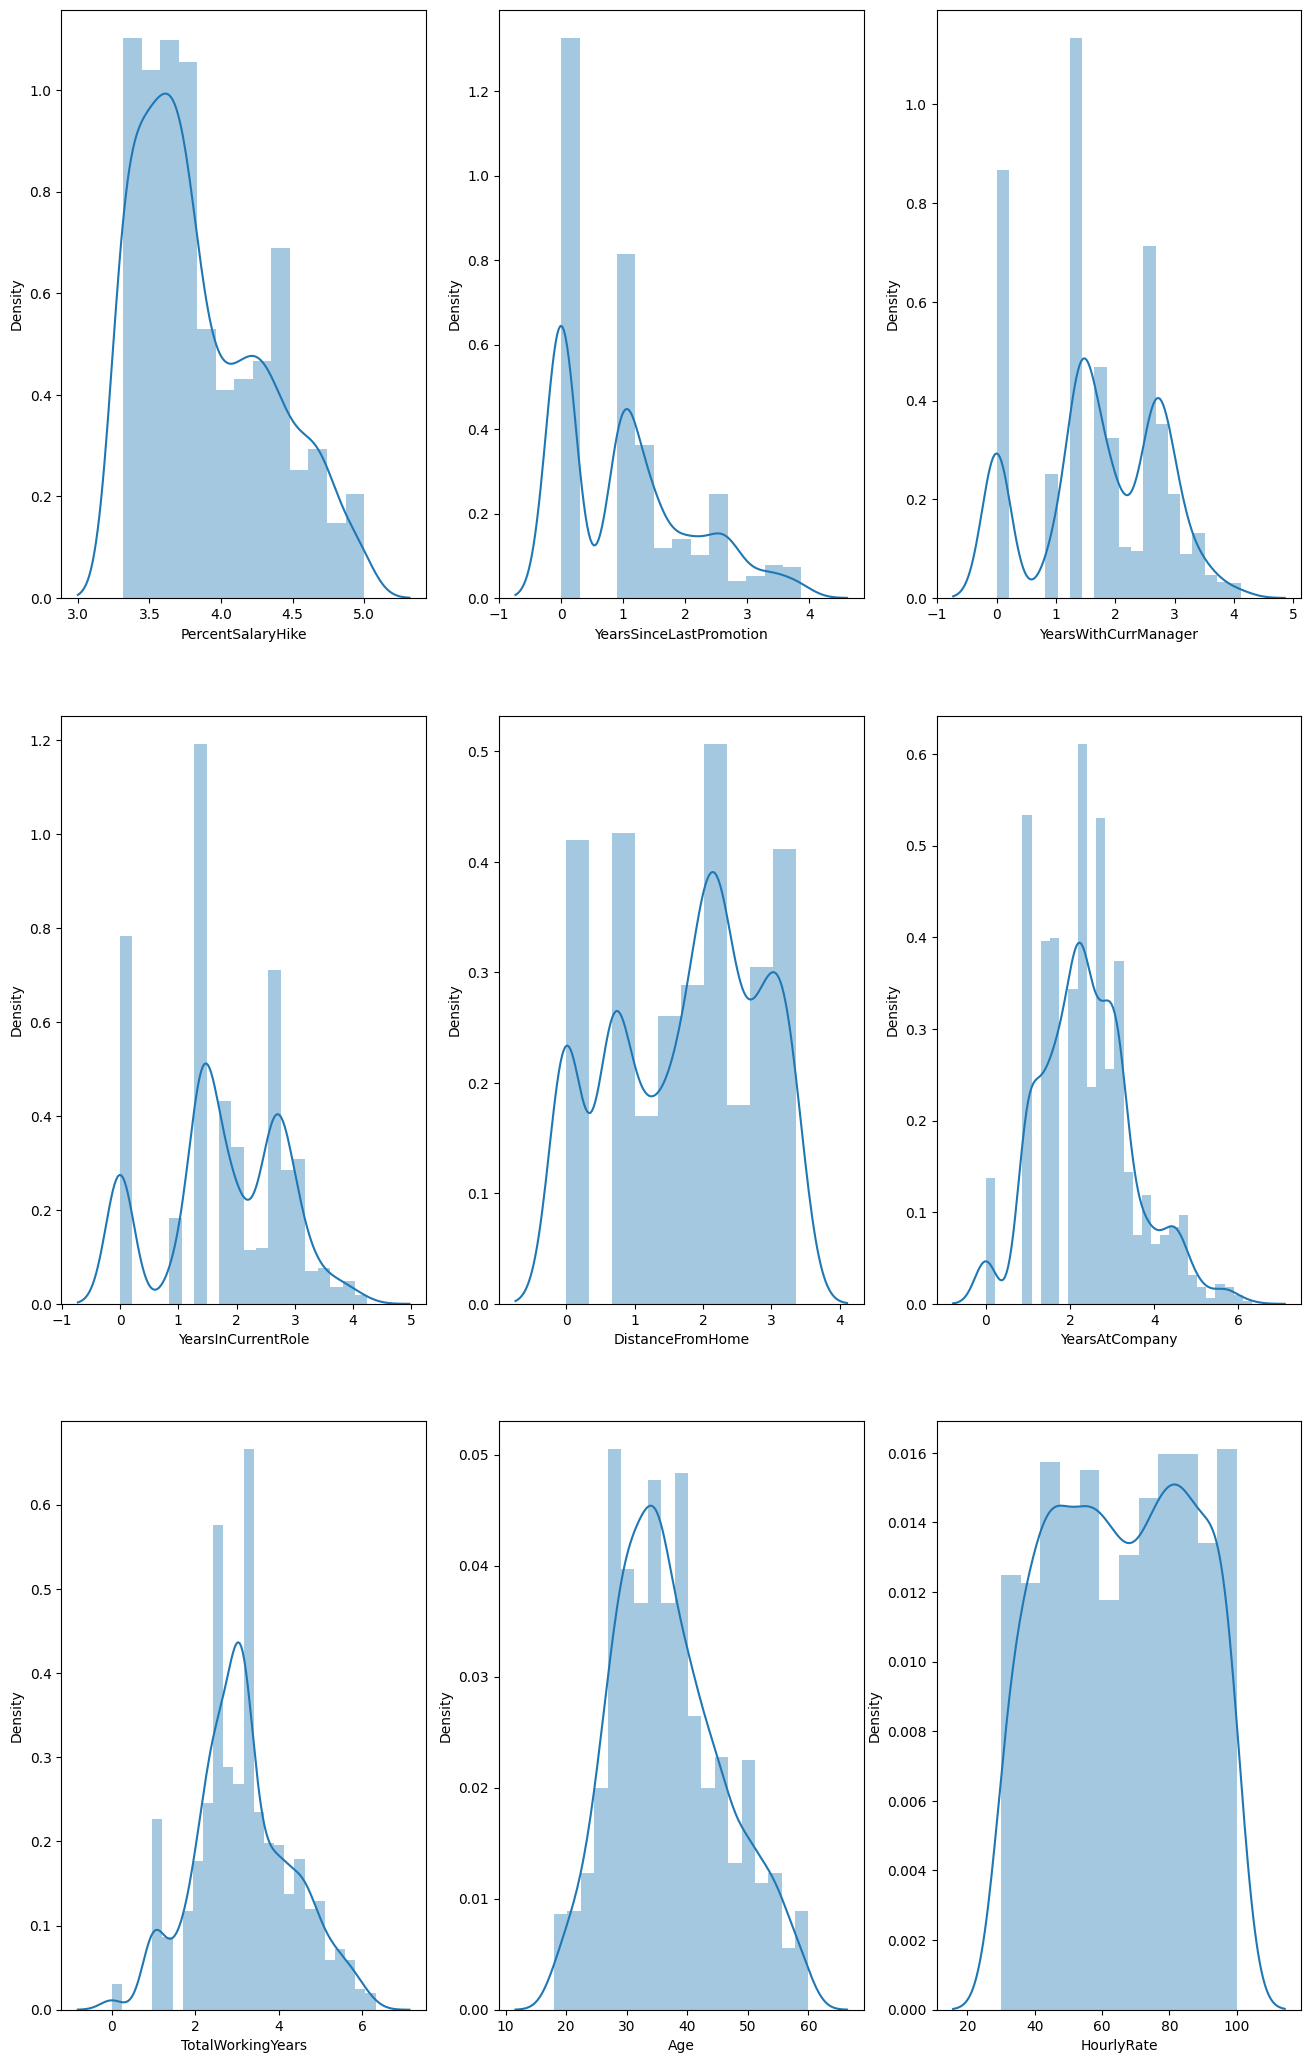

In [34]:
columns = ['PercentSalaryHike', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
           'YearsInCurrentRole', 'DistanceFromHome', 'YearsAtCompany',
           'TotalWorkingYears', 'Age', 'HourlyRate']
fig, ax = plt.subplots(3,3, figsize=(16,10))
sns.distplot(data['PercentSalaryHike'], ax = ax[0,0])
sns.distplot(data['YearsSinceLastPromotion'], ax = ax[0,1])
sns.distplot(data['YearsWithCurrManager'], ax = ax[0,2])
sns.distplot(data['YearsInCurrentRole'], ax = ax[1,0])
sns.distplot(data['DistanceFromHome'], ax = ax[1,1])
sns.distplot(data['YearsAtCompany'], ax = ax[1,2])
sns.distplot(data['TotalWorkingYears'], ax = ax[2,0])
sns.distplot(data['Age'], ax = ax[2,1])
sns.distplot(data['HourlyRate'], ax = ax[2,2])
plt.subplots_adjust(bottom=-1, top=1)
plt.show()

/tmp/ipykernel_394/2247500726.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['DailyRate'], ax = ax[0])
/tmp/ipykernel_394/2247500726.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MonthlyIncome'], ax = ax[1])
/tmp/ipykernel_394/2247500726.py:5: UserWarning: 

`distplot` is a

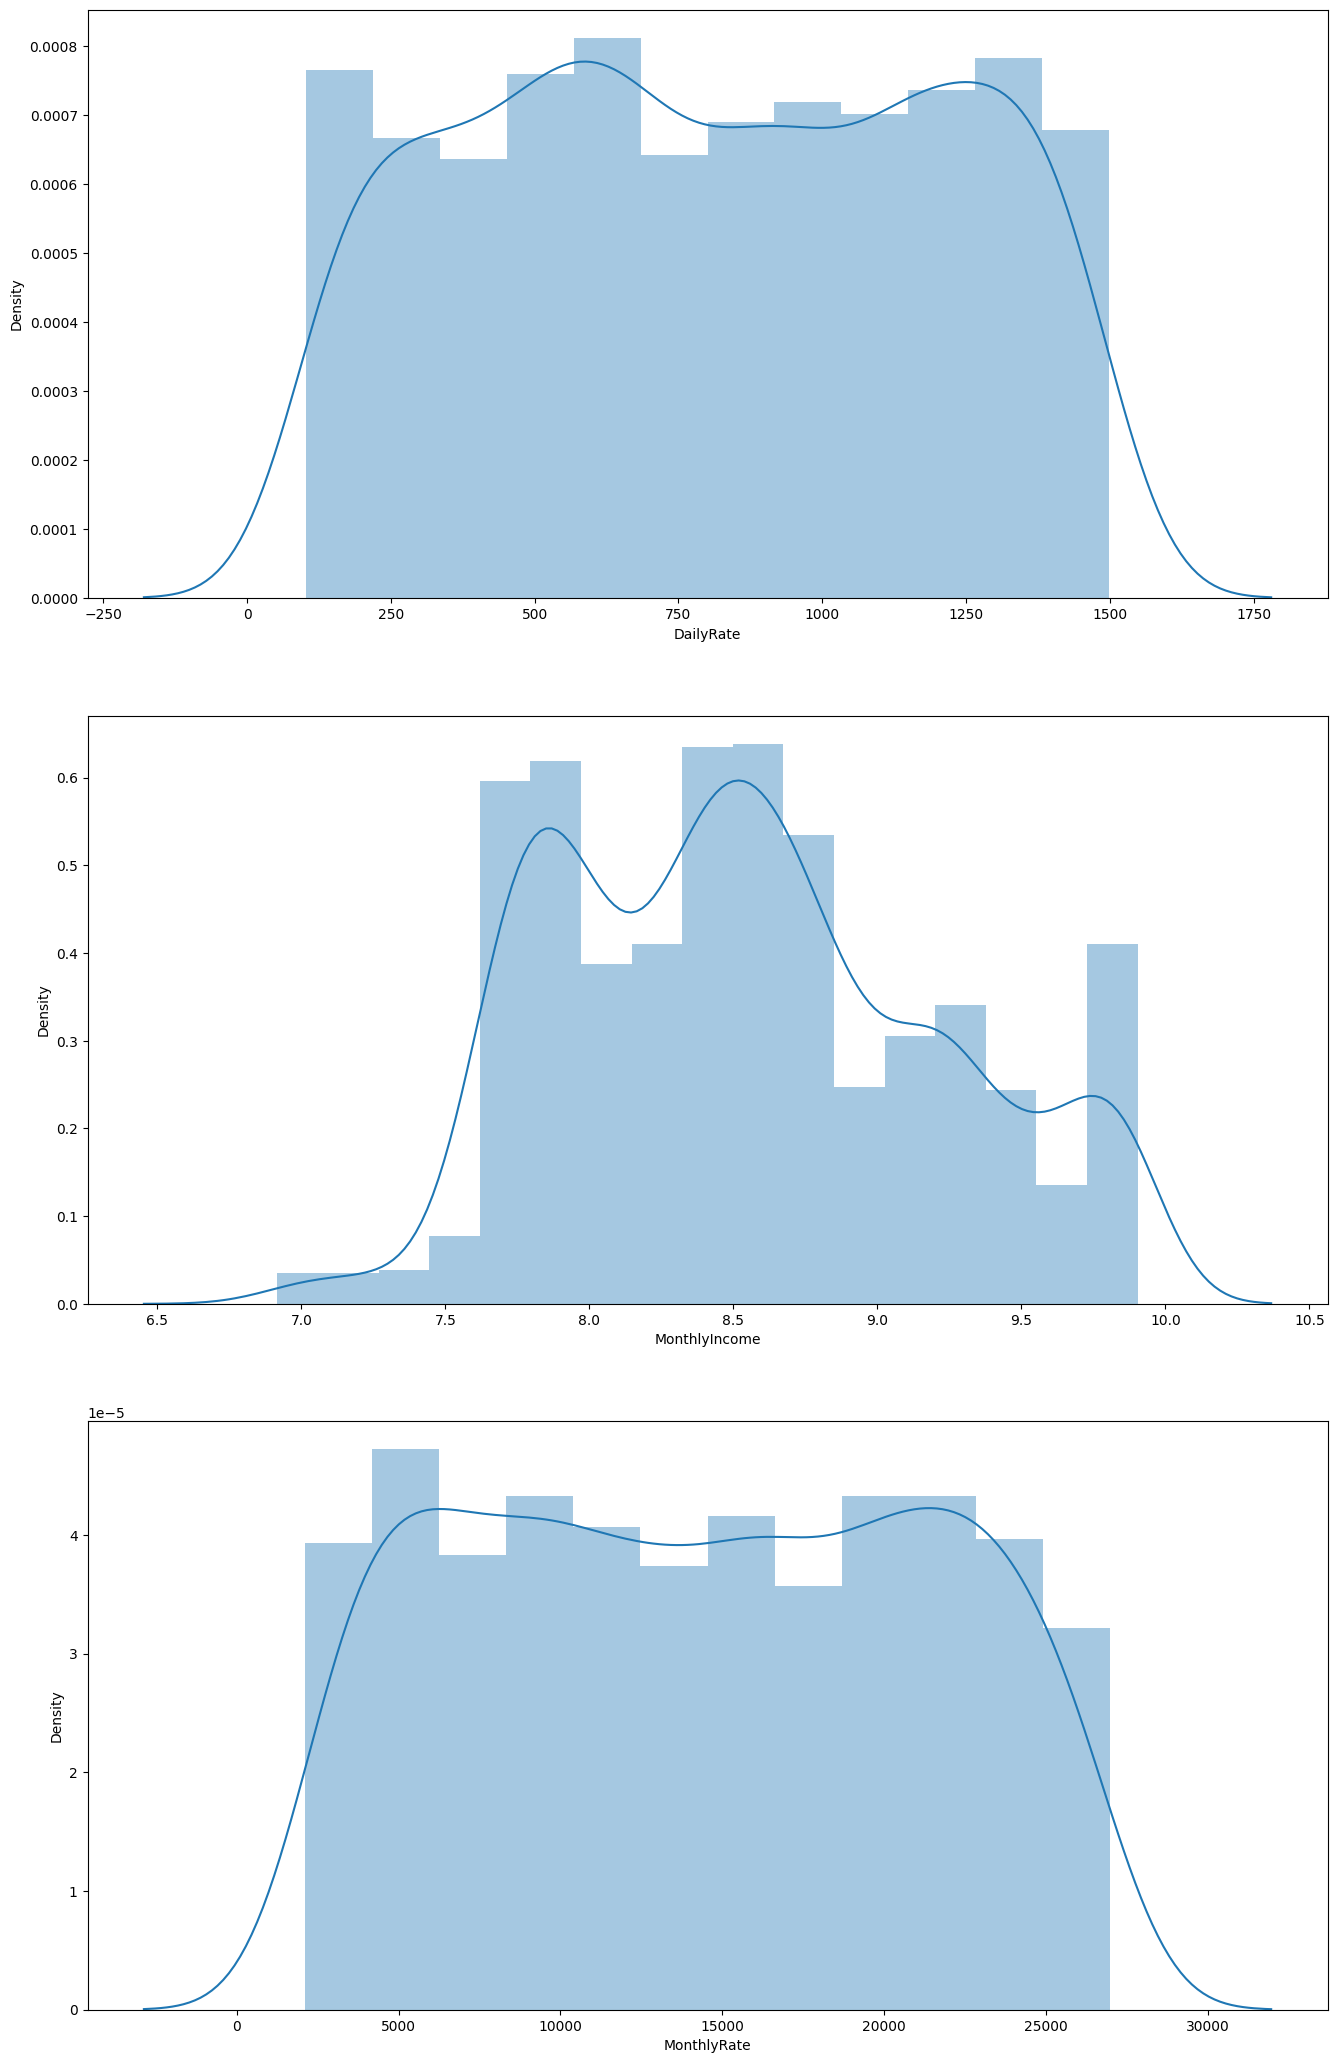

In [35]:
columns = ['DailyRate', 'MonthlyIncome', 'MonthlyRate']
fig, ax = plt.subplots(3, figsize=(16,10))
sns.distplot(data['DailyRate'], ax = ax[0])
sns.distplot(data['MonthlyIncome'], ax = ax[1])
sns.distplot(data['MonthlyRate'], ax = ax[2])
plt.subplots_adjust(bottom=-1, top=1)
plt.show()

In [36]:
data.shape

(1470, 31)

In [37]:
x = data.copy()
x = x.drop('Attrition', axis=1)
y = data['Attrition']

In [38]:
scaler = MinMaxScaler()
xd = scaler.fit_transform(x)
x = pd.DataFrame(xd, columns=x.columns)

NameError: name 'MinMaxScaler' is not defined

In [39]:
np.random.seed(12345)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.149)

NameError: name 'train_test_split' is not defined

In [41]:
x_test.shape

NameError: name 'x_test' is not defined

In [42]:
columns = list(x_test.columns)
columns

NameError: name 'x_test' is not defined

In [43]:
metrics = ['accuracy', 'precision', 'recall', 'f1_micro']
for metric in metrics:
    np.random.seed(12345)
    clf = SVC(kernel='linear', C=1)
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring = metric)
    print('Cross validation score for {} is {}'.format(metric, np.mean(scores)))
print()

np.random.seed(12345)
clf = SVC(kernel='linear', C=1)     # class_weight='balanced'
start_time = time.time()
clf.fit(x_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
preds = clf.predict(x_test)
test_time = time.time() - start_time
print('Test score for {} is {}'.format('accuracy', accuracy_score(y_test, preds)))
print('Test score for {} is {}'.format('precision', precision_score(y_test, preds)))
print('Test score for {} is {}'.format('recall', recall_score(y_test, preds)))
print('Test score for {} is {}'.format('f1_micro', f1_score(y_test, preds, average='micro')))
print()

print('Training time for SVC is {:.3f} seconds'.format(training_time))
print('Test time for SVC is {:.3f} seconds'.format(test_time))

NameError: name 'SVC' is not defined

In [44]:
metrics = ['accuracy', 'precision', 'recall', 'f1_micro']
for metric in metrics:
    np.random.seed(12345)
    clf = LogisticRegression(penalty='l2')
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring = metric)
    print('Cross validation score for {} is {}'.format(metric, np.mean(scores)))
print()

np.random.seed(12345)
clf = LogisticRegression(penalty='l2')
start_time = time.time()
clf.fit(x_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
preds = clf.predict(x_test)
test_time = time.time() - start_time
print('Test score for {} is {}'.format('accuracy', accuracy_score(y_test, preds)))
print('Test score for {} is {}'.format('precision', precision_score(y_test, preds)))
print('Test score for {} is {}'.format('recall', recall_score(y_test, preds)))
print('Test score for {} is {}'.format('f1_micro', f1_score(y_test, preds, average='micro')))
print()

print('Training time for LR is {:.3f} seconds'.format(training_time))
print('Test time for LR is {:.3f} seconds'.format(test_time))

NameError: name 'LogisticRegression' is not defined

In [45]:
metrics = ['accuracy', 'precision', 'recall', 'f1_micro']
for metric in metrics:
    np.random.seed(12345)
    clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=15)
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring = metric)
    print('Cross validation score for {} is {}'.format(metric, np.mean(scores)))
print()

np.random.seed(12345)
clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=15)
start_time = time.time()
clf.fit(x_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
preds = clf.predict(x_test)
test_time = time.time() - start_time
print('Test score for {} is {}'.format('accuracy', accuracy_score(y_test, preds)))
print('Test score for {} is {}'.format('precision', precision_score(y_test, preds)))
print('Test score for {} is {}'.format('recall', recall_score(y_test, preds)))
print('Test score for {} is {}'.format('f1_micro', f1_score(y_test, preds, average='micro')))
print()

print('Training time for RFC is {:.3f} seconds'.format(training_time))
print('Test time for RFC is {:.3f} seconds'.format(test_time))

NameError: name 'RandomForestClassifier' is not defined

In [46]:
np.random.seed(12345)
clf = SVC(kernel='linear', C=1)
sfm = SelectFromModel(clf, threshold=0.97)
sfm.fit(x_train, y_train)

for feature_list_index in sfm.get_support(indices=True):
    print(columns[feature_list_index])

NameError: name 'SVC' is not defined

In [47]:
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

NameError: name 'sfm' is not defined

In [48]:
np.random.seed(12345)
clf = SVC(kernel='linear', C=1)
start_time = time.time()
clf.fit(x_important_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
preds = clf.predict(x_important_test)
test_time = time.time() - start_time
print('Test score for {} is {}'.format('accuracy', accuracy_score(y_test, preds)))
print('Test score for {} is {}'.format('precision', precision_score(y_test, preds)))
print('Test score for {} is {}'.format('recall', recall_score(y_test, preds)))
print('Test score for {} is {}'.format('f1_micro', f1_score(y_test, preds, average='micro')))
print()

print('Training time for SVC is {:.3f} seconds'.format(training_time))
print('Test time for SVC is {:.3f} seconds'.format(test_time))

NameError: name 'SVC' is not defined

In [49]:
np.random.seed(12345)
clf = SVC(kernel='linear', C=1)
sfm = SelectFromModel(clf, threshold=0.4)
sfm.fit(x_train, y_train)

for feature_list_index in sfm.get_support(indices=True):
    print(columns[feature_list_index])

NameError: name 'SVC' is not defined

In [50]:
sfm.get_support(indices=True).shape

NameError: name 'sfm' is not defined

In [51]:
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

NameError: name 'sfm' is not defined

In [52]:
np.random.seed(12345)
clf = SVC(kernel='linear', C=1)
start_time = time.time()
clf.fit(x_important_train, y_train)
training_time = time.time() - start_time

start_time = time.time()
preds = clf.predict(x_important_test)
test_time = time.time() - start_time
print('Test score for {} is {}'.format('accuracy', accuracy_score(y_test, preds)))
print('Test score for {} is {}'.format('precision', precision_score(y_test, preds)))
print('Test score for {} is {}'.format('recall', recall_score(y_test, preds)))
print('Test score for {} is {}'.format('f1_micro', f1_score(y_test, preds, average='micro')))
print()

print('Training time for SVC is {:.3f} seconds'.format(training_time))
print('Test time for SVC is {:.3f} seconds'.format(test_time))

NameError: name 'SVC' is not defined